In [1]:
import fastf1 as ff1
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from fastf1 import plotting
import numpy as np
plotting.setup_mpl()
ff1.Cache.enable_cache('cache2')

In [2]:
race = ff1.get_session(2021, 'Abu Dhabi', 'R')
laps = race.load_laps(with_telemetry=True)

ver_lap = laps.pick_driver('VER')
ver_lap_37 = ver_lap.loc[ver_lap['LapNumber'] == 57]
ham_lap = laps.pick_driver('HAM')
ham_lap_37 = ham_lap.loc[ham_lap['LapNumber'] == 57]

ver_tel = ver_lap_37.get_car_data().add_distance()
ham_tel = ham_lap_37.get_car_data().add_distance()

ver_tel = pd.DataFrame(ver_tel)
ham_tel = pd.DataFrame(ham_tel)

ver_tel['Time'] = ver_tel['Time'].apply(lambda x: x / np.timedelta64(1, 's'))
ham_tel['Time'] = ham_tel['Time'].apply(lambda x: x / np.timedelta64(1, 's'))

core           INFO 	Loading laps for Abu Dhabi Grand Prix - Race [v2.1.12]
api            INFO 	No cached data found for timing_data. Loading data...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_app_data. Loading data...
api            INFO 	Fetching timing app data...
api            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
api            INFO 	No cached data found for driver_info. Loading data...
api            INFO 	Fetching driver list...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for session_status_data. Loading data...
api            INFO 	Fetching session status data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for track_status_data. Loading data...
api            INFO 	Fetching track 

In [3]:
accel_list = []
for i in range(0, 397):
    accel_list.append(((ver_tel['Speed'].iloc[i+1] - ver_tel['Speed'].iloc[i])*(10/36))/(ver_tel['Time'].iloc[i+1] - ver_tel['Time'].iloc[i]))

In [4]:
ver_tel['Acceleration'] = accel_list

ValueError: Length of values (397) does not match length of index (603)

In [35]:
ver_tel['Acceleration']

0      2.314815
1      0.992063
2      1.157407
3      1.157407
4      1.157407
         ...   
393    0.000000
394    1.157407
395    0.000000
396    1.157407
397    0.000000
Name: Acceleration, Length: 398, dtype: float64

In [36]:
ver_tel.Acceleration

0      2.314815
1      0.992063
2      1.157407
3      1.157407
4      1.157407
         ...   
393    0.000000
394    1.157407
395    0.000000
396    1.157407
397    0.000000
Name: Acceleration, Length: 398, dtype: float64

In [38]:
ver_tel.to_excel('ver_tel.xlsx')

In [46]:
accel_list1 = []
for i in range(0, 403):
    accel_list1.append(((ham_tel['Speed'].iloc[i+1] - ham_tel['Speed'].iloc[i])*(10/36))/(ham_tel['Time'].iloc[i+1] - ham_tel['Time'].iloc[i]))
accel_list1.append(0)

In [48]:
ham_tel['Acceleration'] = accel_list1

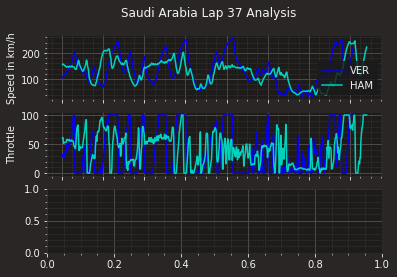

In [5]:
rbr_color = ff1.plotting.team_color('RBR')
mer_color = ff1.plotting.team_color('MER')

fig, ax = plt.subplots(3)
plt.suptitle("Saudi Arabia Lap 37 Analysis")

ax[0].plot(ver_tel['Time'], ver_tel['Speed'], color=rbr_color, label='VER')
ax[0].plot(ham_tel['Time'], ham_tel['Speed'], color=mer_color, label='HAM')
ax[0].set_ylabel('Speed in km/h')
ax[0].legend(loc='lower right')

ax[1].plot(ver_tel['Time'], ver_tel['Throttle'], color=rbr_color, label='VER')
ax[1].plot(ham_tel['Time'], ham_tel['Throttle'], color=mer_color, label='HAM')
ax[1].set_ylabel('Throttle')

#ax[2].plot(ver_tel['Time'], ver_tel['Acceleration'], color=rbr_color, label='VER')
#ax[2].plot(ham_tel['Time'], ham_tel['Acceleration'], color=mer_color, label='HAM')
#ax[2].set_ylabel('Brakes')

for a in ax.flat:
    a.label_outer()

plt.show()
